# Guided Example and Challenge - Boosting

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

from sklearn         import ensemble, datasets
from sklearn.utils   import shuffle
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [3]:
df = pd.read_csv(("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
                  "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
# Define outcome and predictors

# Set our outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis = 1)

# Create trainng and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[ : offset], y[ : offset]

# Put the remaining 10% in the test set
X_test, y_test = X[offset : ], y[offset : ]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [5]:
# We'll make 500 iterations, use trees that are 2 branches deep, and set our loss function
params = {'n_estimators': 500, 'max_depth': 2, 'loss':'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(** params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins = True)
table_test  = pd.crosstab(y_test,  predict_test,  margins = True)

train_tI_errors  = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors  = table_test.loc[0.0, 1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0] / table_test.loc['All', 'All']

print(('--- TRAINING SET ACCURACY ---\n'
      'Percent Type I  Errors: {}%\n'
      'Percent Type II Errors: {}%\n'
      '\n'
      '----- TEST SET ACCURACY -----\n'
      'Percent Type I  Errors: {}%\n'
      'Percent Type II Errors: {}%')
     .format((train_tI_errors  * 100).round(2),
             (train_tII_errors * 100).round(2),
             (test_tI_errors   * 100).round(2),
             (test_tII_errors  * 100).round(2)))

--- TRAINING SET ACCURACY ---
Percent Type I  Errors: 4.65%
Percent Type II Errors: 17.61%

----- TEST SET ACCURACY -----
Percent Type I  Errors: 6.26%
Percent Type II Errors: 18.53%


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

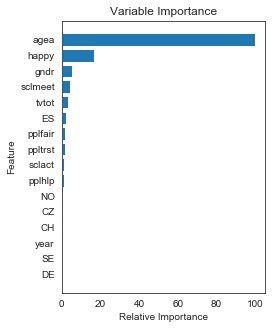

In [6]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, X.columns[sorted_idx])
plt.title('Variable Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

## My Attempt

Bring in the data again, clean it up, make some new features, and try again.

In [7]:
df2 = df

In [9]:
df2['gndr'] = df2['gndr'] - 1
df2['partner'] = df2['partner'] - 1

In [67]:
df2['pplhappy'] = (df2['ppltrst'] * df2['pplfair'] * df2['pplhlp'])
df2['pplhappy2'] = df2['pplhappy'] ** df2['happy']
df2['agesq'] = df2['agea'] ** 2
df2['agecubed'] = df2['agea'] ** 3
df2['agesqrt'] = df2['agea'] ** 0.5
df2['agegender'] = df2['agea'] * df2['gndr']
df2['agehappy'] = (df2['agea'] ** 2) * (df2['happy'] ** 2)

In [80]:
X = df2.loc[:, ~df2.columns.isin(['partner', 'cntry', 'agea', 'agesq'])]
y = df2['partner']

# Create trainng and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[ : offset], y[ : offset]

# Put the remaining 10% in the test set
X_test, y_test = X[offset : ], y[offset : ]

In [81]:
# We'll make 500 iterations, use trees that are 2 branches deep, and set our loss function
params = {'n_estimators': 600, 'max_depth': 3, 'loss':'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(** params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins = True)
table_test  = pd.crosstab(y_test,  predict_test,  margins = True)

train_tI_errors  = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors  = table_test.loc[0.0, 1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0] / table_test.loc['All', 'All']

print(('--- TRAINING SET ACCURACY ---\n'
      'Percent Type I  Errors: {}%\n'
      'Percent Type II Errors: {}%\n'
      '\n'
      '----- TEST SET ACCURACY -----\n'
      'Percent Type I  Errors: {}%\n'
      'Percent Type II Errors: {}%')
     .format((train_tI_errors  * 100).round(2),
             (train_tII_errors * 100).round(2),
             (test_tI_errors   * 100).round(2),
             (test_tII_errors  * 100).round(2)))

--- TRAINING SET ACCURACY ---
Percent Type I  Errors: 2.48%
Percent Type II Errors: 13.13%

----- TEST SET ACCURACY -----
Percent Type I  Errors: 6.26%
Percent Type II Errors: 20.49%


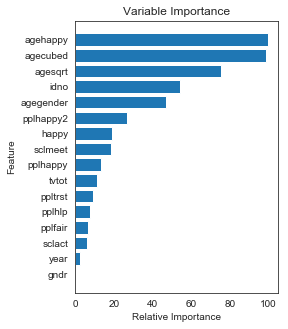

In [82]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, X.columns[sorted_idx])
plt.title('Variable Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

It appears much more difficult than I had anticipated. Adding more features did not seem to have any impact. Making the test set larger and adding more stringent parameters on the classifier just made the training set more accurate and the test set less accurate.